In [41]:

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
(xtrain,ytrain),(xtest,ytest)=datasets.fashion_mnist.load_data()

In [43]:
print(xtrain)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [44]:
print(len(ytrain))

60000


In [45]:
print(ytrain[:5])

[9 0 0 3 0]


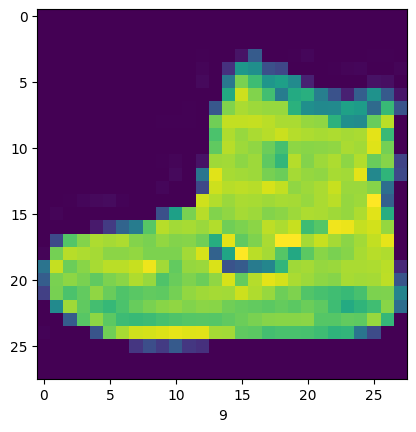

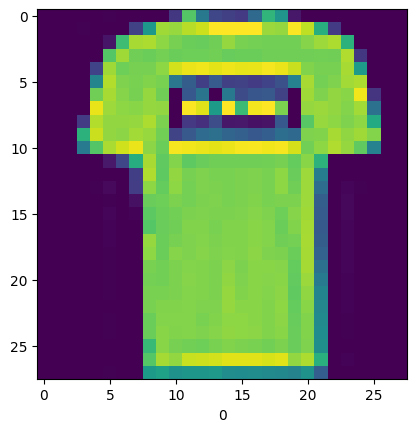

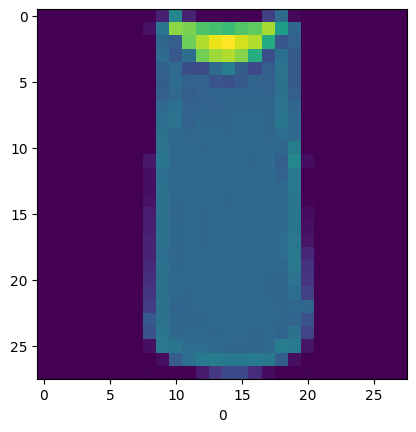

In [46]:
for i in range(3):
  plt.imshow(xtrain[i])
  plt.xlabel(ytrain[i])
  plt.show()

In [47]:
print(xtrain.shape)

(60000, 28, 28)


In [48]:
print(ytrain.shape)

(60000,)


In [49]:
print(xtest.shape)

(10000, 28, 28)


In [50]:
print(xtrain.shape[0])

60000


In [51]:
xtest[0].shape

(28, 28)

In [52]:
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest=xtest.reshape((xtest.shape[0], 28, 28, 1))

In [53]:
xtrain.shape

(60000, 28, 28, 1)

In [54]:
xtrain.shape[0]

60000

In [58]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [55]:
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)


In [56]:
#building neural network
model=models.Sequential()
model.add(layers.Conv2D(12, (3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten()),
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
print(model.summary())
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xval, yval))


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 12)       0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 2028)              0         
                                                                 
 dense_36 (Dense)            (None, 300)               608700    
                                                                 
 dense_37 (Dense)            (None, 100)               30100     
                                                                 
 dense_38 (Dense)            (None, 10)                1010      
                                                     

In [57]:
model.save("Mnist_acc_0.91.h5")